In [1]:
import numpy as np
import pandas as pd

In [2]:
df.shape

NameError: name 'df' is not defined

In [3]:
df = pd.read_csv('alldefaultprob.csv')
df = df.set_index(pd.to_datetime(df['date']))
df = df.drop(['date'], axis=1)
df.head()

,company_symbol,rating,RSK_BB_IMPLIED_CDS_SPREAD,DD,DC,dp_BB_1year,dp_cds,dp_stock,change_direction
date,,,,,,,,,
2014-02-20,LUV,10,112.0,80.301018,89.648905,0.000056,2.077922,0.0,0
2014-02-21,LUV,10,112.0,80.407366,89.849718,0.000056,2.077922,0.0,0
2014-02-24,LUV,10,110.0,81.276836,90.144988,0.000052,2.040816,0.0,0
2014-02-25,LUV,10,110.0,81.580164,90.499827,0.000051,2.040816,0.0,0
2014-02-26,LUV,10,109.0,81.831987,90.632234,0.000050,2.022263,0.0,0


In [4]:
universe = list(set(df.company_symbol.values))

In [5]:
def find_change(array_like):
    if 1 in list(set(array_like)):
        return 1
    elif -1 in list(set(array_like)):
        return -1
    else:
        return 0

In [6]:
rating_prediction = pd.DataFrame()
for ticker in universe:
    df_test = df[df.company_symbol == ticker]
    pred = df_test['change_direction'].rolling(window='90D').apply(find_change).shift(-89,freq = "D")
    test_merge = pd.merge(df_test, pred, how='inner', left_index=True, right_index=True)
    rating_prediction = pd.concat([rating_prediction, test_merge])


D:\anacondasetup\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


In [22]:
df_test = df.iloc[0:10]

In [23]:
df_test

,company_symbol,rating,RSK_BB_IMPLIED_CDS_SPREAD,DD,DC,dp_BB_1year,dp_cds,dp_stock,change_direction
date,,,,,,,,,
2014-02-20,LUV,10,112.0,80.301018,89.648905,0.000056,2.077922,0.0,0
2014-02-21,LUV,10,112.0,80.407366,89.849718,0.000056,2.077922,0.0,0
2014-02-24,LUV,10,110.0,81.276836,90.144988,0.000052,2.040816,0.0,0
2014-02-25,LUV,10,110.0,81.580164,90.499827,0.000051,2.040816,0.0,0
2014-02-26,LUV,10,109.0,81.831987,90.632234,0.000050,2.022263,0.0,0
2014-02-27,LUV,10,108.0,81.883591,90.711181,0.000048,2.003711,0.0,0
2014-02-28,LUV,10,108.0,81.785622,90.648266,0.000048,2.003711,0.0,0
2014-03-03,LUV,10,109.0,81.291690,90.427821,0.000049,2.022263,0.0,0
2014-03-04,LUV,10,107.0,82.556603,90.721002,0.000045,1.985158,0.0,0


In [30]:
pred1 = df_test['DD'].rolling(window='3D').sum()
pred2 = df_test['DD'].rolling(window='3D').sum().shift(-2,freq = "D")
# test_merge = pd.merge(df_test, pred1, how='inner', left_index=True, right_index=True)
# test = pd.concat([test, test_merge])
print(pred1)
print(pred2)

date
2014-02-20     80.301018
2014-02-21    160.708384
2014-02-24     81.276836
2014-02-25    162.857000
2014-02-26    244.688986
2014-02-27    245.295742
2014-02-28    245.501199
2014-03-03     81.291690
2014-03-04    163.848293
2014-03-05    246.846851
Name: DD, dtype: float64
date
2014-02-18     80.301018
2014-02-19    160.708384
2014-02-22     81.276836
2014-02-23    162.857000
2014-02-24    244.688986
2014-02-25    245.295742
2014-02-26    245.501199
2014-03-01     81.291690
2014-03-02    163.848293
2014-03-03    246.846851
Name: DD, dtype: float64


In [25]:
len(pred1)

10

In [8]:
print(len(df), len(rating_prediction))

199717 109042


In [74]:
rating_prediction=rating_prediction.rename(columns = {'change_direction_y':'target_3m','change_direction_x':'change_direction'})

In [113]:
rating_prediction.to_csv('target3m.csv')

In [112]:
rating_prediction.head()

,company_symbol,rating,RSK_BB_IMPLIED_CDS_SPREAD,DD,DC,dp_BB_1year,dp_cds,dp_stock,change_direction,target_3m
date,,,,,,,,,,
2014-11-21,SLB,4,70.0,169.063240,154.496437,0.000003,1.298701,0.0,0,0.0
2014-11-26,SLB,4,74.0,164.529922,149.494610,0.000004,1.372913,0.0,0,0.0
2014-11-28,SLB,4,86.0,158.295617,144.792346,0.000009,1.595547,0.0,0,0.0
2014-12-03,SLB,4,86.0,158.846747,144.328443,0.000009,1.595547,0.0,0,0.0
2014-12-04,SLB,4,85.0,159.423090,144.925693,0.000009,1.576994,0.0,0,0.0


In [106]:
pred_month = pd.DataFrame()
for ticker in universe:
    df_test = rating_prediction[rating_prediction.company_symbol == ticker]
    pred = df_test['change_direction'].rolling(window='60D').apply(find_change).shift(-59,freq = "D")
    test_merge = pd.merge(df_test, pred, how='inner', left_index=True, right_index=True)
    pred_month = pd.concat([pred_month, test_merge])


D:\anacondasetup\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


In [111]:
df_test = rating_prediction[rating_prediction.company_symbol == 'SLB']
pred = df_test['change_direction'].rolling(window='60D').apply(find_change,raw=True).shift(-59,freq = "D")
test_merge = pd.merge(df_test, pred, how='inner', left_index=True, right_index=True)
test_merge.head()

,company_symbol,rating,RSK_BB_IMPLIED_CDS_SPREAD,DD,DC,dp_BB_1year,dp_cds,dp_stock,change_direction_x,target_3m,change_direction_y
date,,,,,,,,,,,


In [92]:
pred_month=pred_month.rename(columns = {'change_direction_y':'target_2m','change_direction_x':'change_direction'})

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
%config InlineBackend.figure_format = 'svg'

<IPython.core.display.Javascript object>


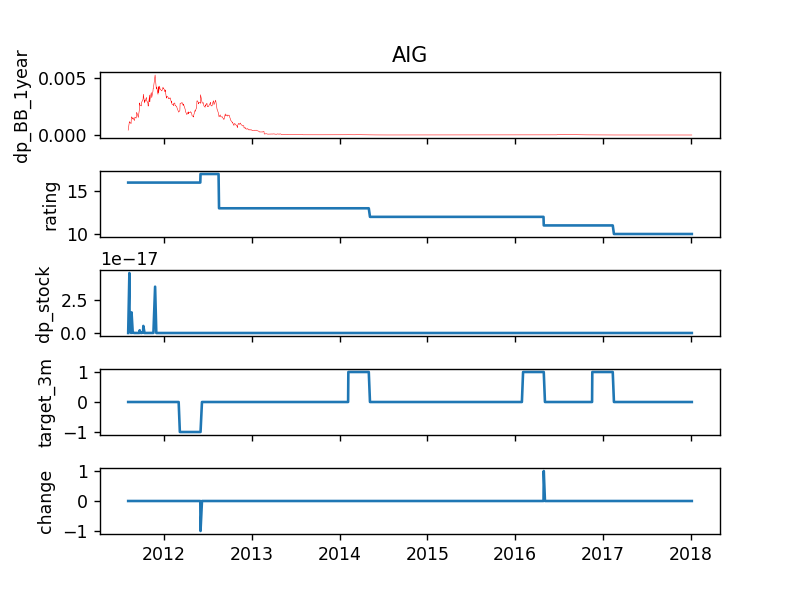

In [89]:
aig = rating_prediction[rating_prediction.company_symbol =='AIG']
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(5, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.plot(aig.index, aig.dp_BB_1year,c = 'r',linewidth=0.3 )
ax1.set_ylabel('dp_BB_1year')
ax1.title.set_text('AIG')

ax2.set_ylabel('rating')
ax2.plot(aig.index, aig.rating)

ax5.set_ylabel('change')
ax5.plot(aig.index, aig.change_direction)

ax3.set_ylabel('dp_stock')
ax3.plot(aig.index, aig.dp_stock)

ax4.set_ylabel('target_3m')
ax4.plot(aig.index, aig.target_3m)


plt.show()


<IPython.core.display.Javascript object>


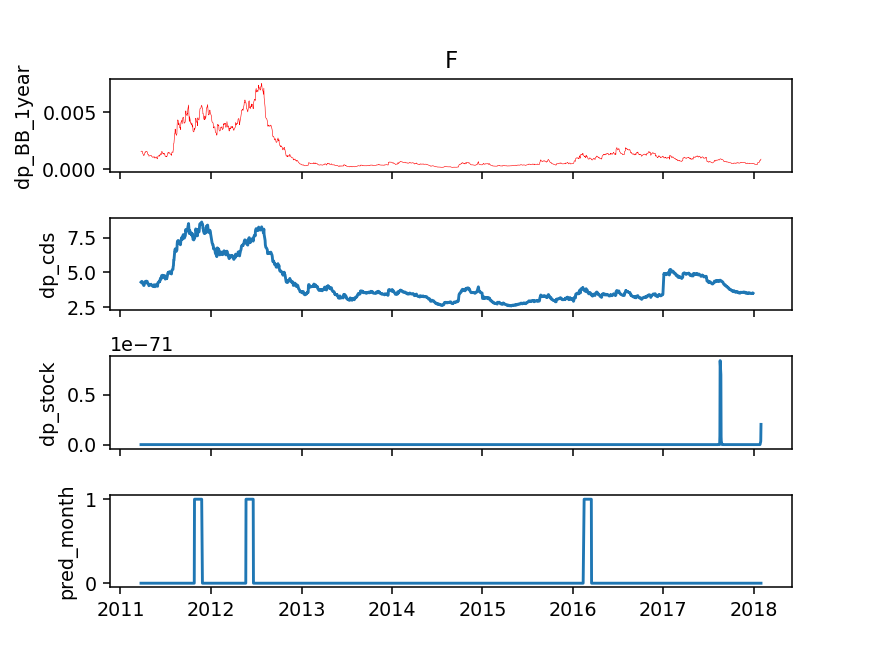

In [36]:
aig = df[df.company_symbol =='F']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.plot(aig.index, aig.dp_BB_1year,c = 'r',linewidth=0.3 )
ax1.set_ylabel('dp_BB_1year')
ax1.title.set_text('F')

ax2.set_ylabel('dp_cds')
ax2.plot(aig.index, aig.dp_cds)

ax3.set_ylabel('dp_stock')
ax3.plot(aig.index, aig.dp_stock)

ax4.set_ylabel('pred_month')
ax4.plot(aig.index, aig.pred_month)

plt.show()

<IPython.core.display.Javascript object>


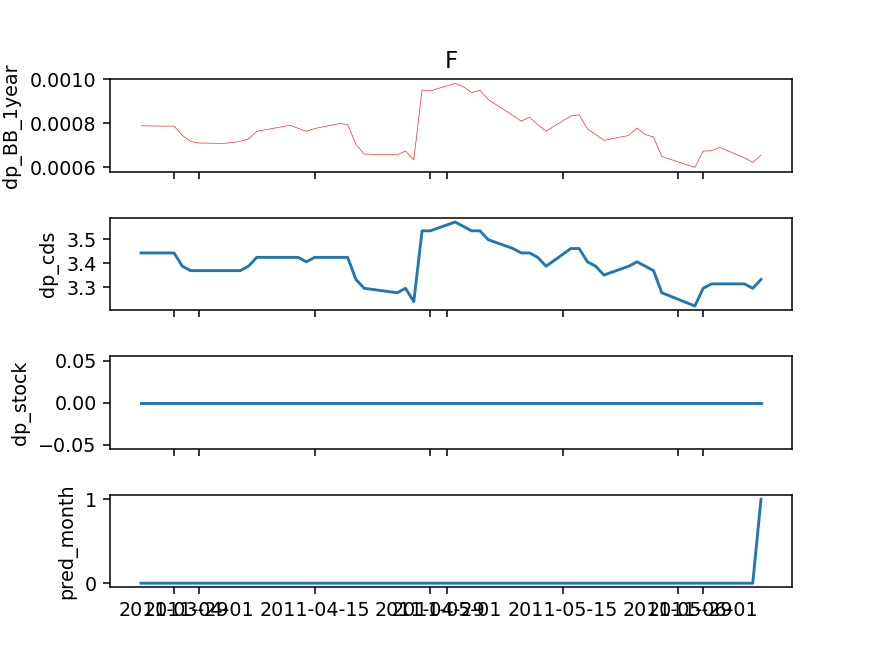

In [37]:
aig = df[df.company_symbol =='IPG']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.plot(aig.index, aig.dp_BB_1year,c = 'r',linewidth=0.3 )
ax1.set_ylabel('dp_BB_1year')
ax1.title.set_text('F')

ax2.set_ylabel('dp_cds')
ax2.plot(aig.index, aig.dp_cds)

ax3.set_ylabel('dp_stock')
ax3.plot(aig.index, aig.dp_stock)

ax4.set_ylabel('pred_month')
ax4.plot(aig.index, aig.pred_month)

plt.show()

<IPython.core.display.Javascript object>


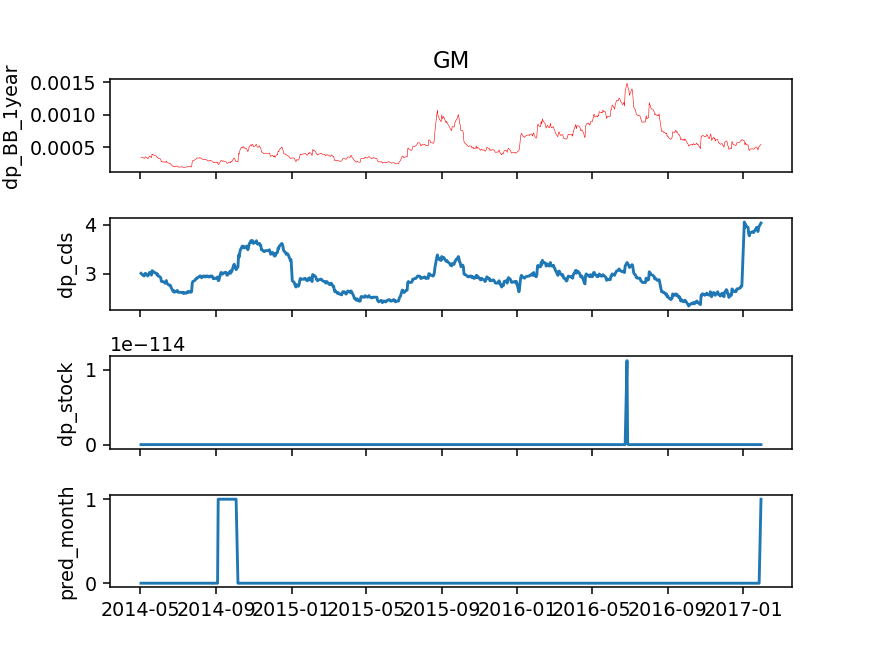

In [39]:
aig = df[df.company_symbol =='GM']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.plot(aig.index, aig.dp_BB_1year,c = 'r',linewidth=0.3 )
ax1.set_ylabel('dp_BB_1year')
ax1.title.set_text('GM')

ax2.set_ylabel('dp_cds')
ax2.plot(aig.index, aig.dp_cds)

ax3.set_ylabel('dp_stock')
ax3.plot(aig.index, aig.dp_stock)

ax4.set_ylabel('pred_month')
ax4.plot(aig.index, aig.pred_month)

plt.show()

<IPython.core.display.Javascript object>


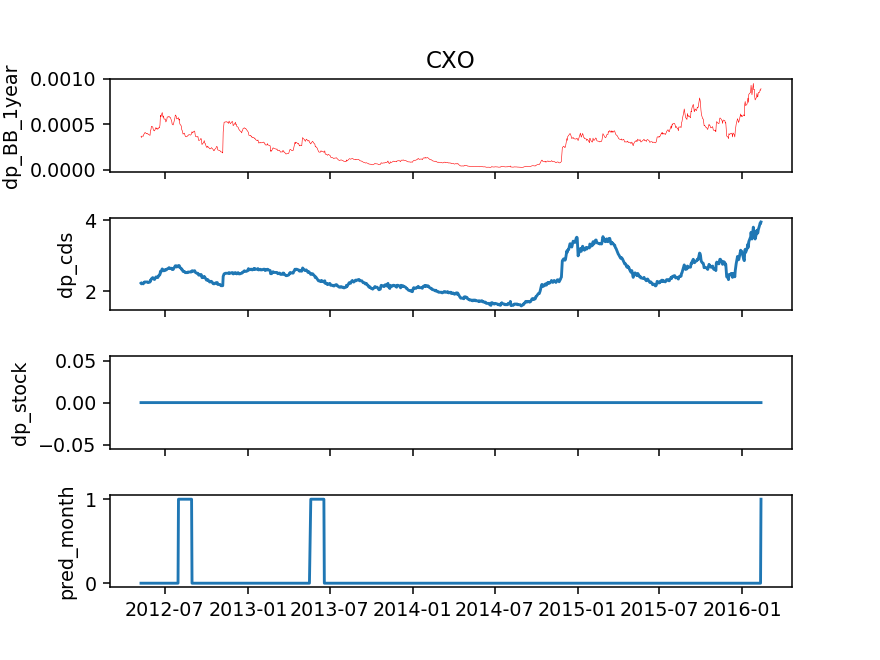

In [40]:
aig = df[df.company_symbol =='CXO']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.plot(aig.index, aig.dp_BB_1year,c = 'r',linewidth=0.3 )
ax1.set_ylabel('dp_BB_1year')
ax1.title.set_text('CXO')

ax2.set_ylabel('dp_cds')
ax2.plot(aig.index, aig.dp_cds)

ax3.set_ylabel('dp_stock')
ax3.plot(aig.index, aig.dp_stock)

ax4.set_ylabel('pred_month')
ax4.plot(aig.index, aig.pred_month)

plt.show()